In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('d:\\Src\\health-des\\logs\\queue-stats-2017-02-09-02-52-39.csv')  # without queue
df['PART_PERC'] = df.PART * 100
df['AVG_H'] = df.AVG / 60.0
df.head()

,Unnamed: 0,TARGET_SCALE,Q2,AVG,N_SURG,Q3,Q1,MIN,BG_SCALE,MAX_QUEUE_LENGTH,MAX,PART,PART_PERC,AVG_H
0,0,0.5,26.5,45.000000,1,56.5,3.85,1.0,0.5,1.0,161.0,0.133333,13.333333,0.750000
1,1,0.5,73.5,73.500000,1,132.0,15.0,15.0,0.5,1.0,132.0,0.090909,9.090909,1.225000
2,2,0.5,148.0,303.666667,1,552.8,116.8,109.0,0.5,1.0,654.0,0.090909,9.090909,5.061111
3,3,0.5,345.0,490.700000,1,1007.05,47.6,30.0,0.5,5.0,1255.0,0.370370,37.037037,8.178333
4,4,0.5,61,61.000000,1,61,61,61.0,0.5,0.0,61.0,0.043478,4.347826,1.016667


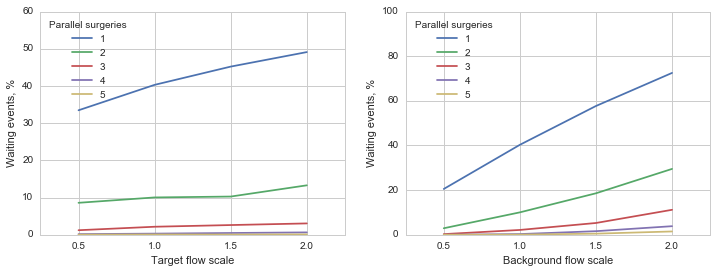

In [3]:
x = df[df.N_SURG == 1].sort_values('TARGET_SCALE').TARGET_SCALE.unique()
plt.figure(figsize=(12,4))
plt.subplot(121)
for ns in df.N_SURG.unique():
    plt.plot(x, df[(df.N_SURG == ns) & (df.BG_SCALE == 1.0)].groupby('TARGET_SCALE')['PART_PERC'].mean(), label=str(ns))
plt.xlabel('Target flow scale')
plt.ylabel('Waiting events, %')
plt.xlim((0.25,2.25))
plt.ylim((0,60))
plt.legend(loc=2, title='Parallel surgeries')
plt.subplot(122)
for ns in df.N_SURG.unique():
    plt.plot(x, df[(df.N_SURG == ns) & (df.TARGET_SCALE == 1.0)].groupby('BG_SCALE')['PART_PERC'].mean(), label=str(ns))
plt.xlabel('Background flow scale')
plt.ylabel('Waiting events, %')
plt.xlim((0.25,2.25))
plt.ylim((0,100))
plt.legend(loc=2, title='Parallel surgeries')

[None]

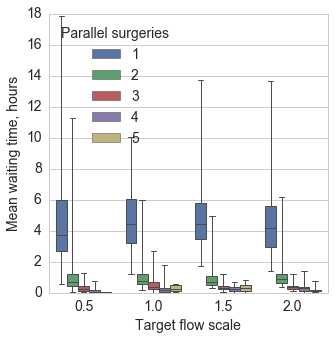

In [4]:
plt.figure(figsize=(5,5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ff = (df.BG_SCALE == 1) & (df.N_SURG > 0)
sns.boxplot(x='TARGET_SCALE', y='AVG_H', data=df[ff], hue='N_SURG', width=0.8, linewidth=1, whis='range')
plt.xlabel('Target flow scale', fontsize=14)
plt.ylabel('Mean waiting time, hours', fontsize=14)
# plt.ylim((0, 500))
lgd = plt.legend(loc=2, title='Parallel surgeries', fontsize=14)
plt.setp(lgd.get_title(), fontsize=14)

[None]

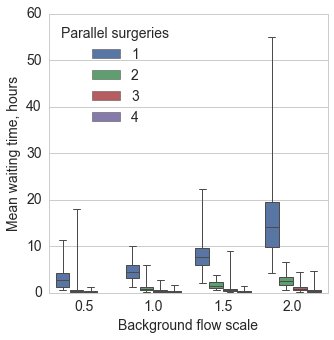

In [5]:
plt.figure(figsize=(5,5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ff = (df.TARGET_SCALE == 1) & (df.N_SURG < 5)
sns.boxplot(x='BG_SCALE', y='AVG_H', data=df[ff], hue='N_SURG', width=0.8, linewidth=1, whis='range')
plt.xlabel('Background flow scale', fontsize=14)
plt.ylabel('Mean waiting time, hours', fontsize=14)
# plt.ylim((0, 500))
lgd = plt.legend(loc=2, title='Parallel surgeries', fontsize=14)
plt.setp(lgd.get_title(), fontsize=14)

[None]

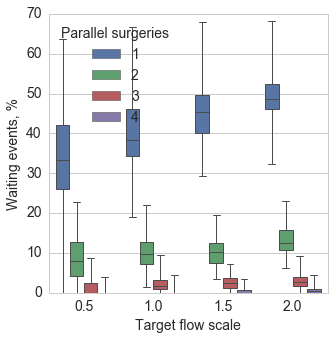

In [6]:
plt.figure(figsize=(5,5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ff = (df.BG_SCALE == 1) & (df.N_SURG < 5)
sns.boxplot(x='TARGET_SCALE', y='PART_PERC', data=df[ff], hue='N_SURG', width=0.8, linewidth=1, whis='range')
plt.xlabel('Target flow scale', fontsize=14)
plt.ylabel('Waiting events, %', fontsize=14)
# plt.ylim((0,100))
lgd = plt.legend(loc=2, title='Parallel surgeries', fontsize=14)
plt.setp(lgd.get_title(),fontsize=14)

[None]

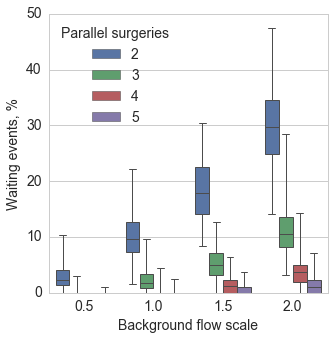

In [7]:
plt.figure(figsize=(5,5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ff = (df.TARGET_SCALE == 1) & (df.N_SURG > 1)
sns.boxplot(x='BG_SCALE', y='PART_PERC', data=df[ff], hue='N_SURG', width=0.8, linewidth=1, whis='range')
plt.xlabel('Background flow scale', fontsize=14)
plt.ylabel('Waiting events, %', fontsize=14)
# plt.ylim((0,100))
lgd = plt.legend(loc=2, title='Parallel surgeries', fontsize=14)
plt.setp(lgd.get_title(),fontsize=14)

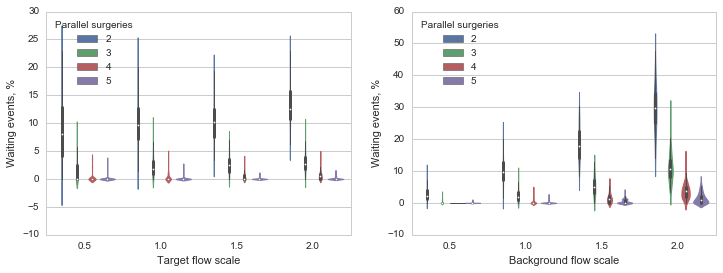

In [8]:
plt.figure(figsize=(12,4))
plt.subplot(121)
ff = (df.BG_SCALE == 1) & (df.N_SURG > 1)
sns.violinplot(x='TARGET_SCALE', y='PART_PERC', data=df[ff], hue='N_SURG', linewidth=1)
plt.xlabel('Target flow scale')
plt.ylabel('Waiting events, %')
# plt.ylim((0,100))
plt.legend(loc=2, title='Parallel surgeries')
plt.subplot(122)
ff = (df.TARGET_SCALE == 1) & (df.N_SURG > 1)
sns.violinplot(x='BG_SCALE', y='PART_PERC', data=df[ff], hue='N_SURG', linewidth=1)
plt.xlabel('Background flow scale')
plt.ylabel('Waiting events, %')
# plt.ylim((0,100))
plt.legend(loc=2, title='Parallel surgeries')